# Running object detection with YOLO
The code in the following cell can be used to run object detection on images using the pre-trained medium YOLO model

In [2]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt")
results = model.predict("cat_dog.jpg")

result = results[0]
box = result.boxes[0]

for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")


image 1/1 c:\Users\julka\repos\coffee-defects\cat_dog.jpg: 448x640 1 cat, 1 dog, 1118.4ms
Speed: 17.1ms preprocess, 1118.4ms inference, 17.5ms postprocess per image at shape (1, 3, 448, 640)
Object type: dog
Coordinates: [261, 94, 461, 313]
Probability: 0.94
---
Object type: cat
Coordinates: [140, 170, 256, 316]
Probability: 0.91
---


In [ ]:
from ultralytics import YOLO

model = model = YOLO("yolov8m.pt")

model.train(data="datasets/data.yaml", epochs=3)


In [4]:
model = YOLO("best.pt")


results = model.predict("datasets/valid/images/20_jpg.rf.475d518135183726870d7c0d8af0565c.jpg")

result = results[0]
box = result.boxes[0]

for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")


image 1/1 c:\Users\julka\repos\coffee-defects\datasets\valid\images\20_jpg.rf.475d518135183726870d7c0d8af0565c.jpg: 640x640 1 longberry, 785.3ms
Speed: 6.9ms preprocess, 785.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Object type: longberry
Coordinates: [47, 14, 167, 229]
Probability: 0.99
---



image 1/1 c:\Users\julka\repos\coffee-defects\datasets\valid\images\144_jpg.rf.8e50d2b33381baeaa9bf71483da8ebbd.jpg: 640x640 1 premium, 137.2ms
Speed: 0.0ms preprocess, 137.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Skipping invalid line in label file: 3 0.399765625 0.08939453125000002 0.9415625 0.08939453125000002 0.9415625 0.8470898437500001 0.399765625 0.8470898437500001


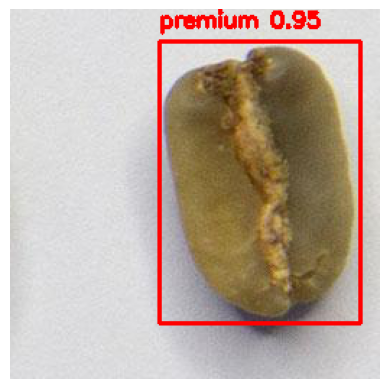

In [38]:
import cv2
import os
import random
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the YOLO model
model = YOLO("best.pt")

# Path to your image and label directories
image_dir = "datasets/valid/images/"
label_dir = "datasets/valid/labels/"

# Choose a random image from the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
random_image = random.choice(image_files)
image_path = os.path.join(image_dir, random_image)

# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

# Run the YOLO model prediction
results = model.predict(image_path)
result = results[0]

# Draw the predicted bounding boxes
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)

    # Extract coordinates
    x1, y1, x2, y2 = cords

    # Draw the bounding box for prediction in blue
    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(image, f"{class_id} {conf}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Draw ground truth bounding boxes
label_path = os.path.join(label_dir, random_image.replace(".jpg", ".txt"))
if os.path.exists(label_path):
    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            
            # Ensure there are exactly 5 parts (class_id, x_center, y_center, width, height)
            if len(parts) == 5:
                try:
                    class_id = int(parts[0])
                    x_center, y_center, width, height = map(float, parts[1:])

                    # Convert YOLO format to corner coordinates
                    img_h, img_w = image.shape[:2]
                    x1 = int((x_center - width / 2) * img_w)
                    y1 = int((y_center - height / 2) * img_h)
                    x2 = int((x_center + width / 2) * img_w)
                    y2 = int((y_center + height / 2) * img_h)

                    # Draw ground truth box in green
                    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(image, f"GT {class_id}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                
                except ValueError as e:
                    print(f"Skipping invalid line in label file: {line}")
            else:
                print(f"Skipping invalid line in label file: {line}")

# Display the image with both predicted and ground truth bounding boxes
plt.imshow(image)
plt.axis("off")
plt.show()


Traceback (most recent call last):
  File "C:\Users\julka\anaconda3\envs\yolo\Scripts\yolo-script.py", line 9, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "C:\Users\julka\anaconda3\envs\yolo\Lib\site-packages\ultralytics\cfg\__init__.py", line 905, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=test'. Valid modes are {'val', 'track', 'export', 'train', 'benchmark', 'predict'}.

    Arguments received: ['yolo', 'task=detect', 'mode=test', 'model=/content/runs/detect/train/weights/best.pt', 'data={dataset.location}/data.yaml']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'pose', 'detect', 'segment', 'obb', 'classify'}
                MODE (required) is one of {'val', 'track', 'export', 'train', 'benchmark', 'predict'}
                ARGS (optional) are any number of custom 'arg=value' pairs like '